# **Tarea de Inteligencia Artificial N°1**

**Estudiantes:**

Felipe Infante

Bastián Ortiz de Zárate

**Profesor:**

Víctor Reyes Rodríguez

**Ayudantes**:

Franco Ramírez

Matias Sotelo


# **0) Parte 1: Red Bayesiana**

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 41.1 MB/s eta 0:00:00


# **1) Carga del Dataset e Información General**

In [ ]:
import pandas as pd

df = pd.read_csv('adult.csv')

print("\nPrimeras 5 filas del dataset: \n ")
print(df.head())

print("\nInformación general de las columnas: \n ")
df.info()

total_filas = len(df)
print(f"\nTamaño del Dataset: {total_filas} filas.")


Primeras 5 filas del dataset: 
 
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4

**1. Descripción del Dataset Utilizado**

El conjunto de datos que se escogió, conocido como "adult.csv", contiene información extraída de la base de datos del Censo de Estados Unidos de 1994. Los datos fueron procesados para incluir únicamente registros de adultos trabajadores. Contiene diferentes características demográficas y laborales como edad, nivel educativo, estado civil, ocupación y horas trabajadas por semana.

[https://www.kaggle.com/datasets/uciml/adult-census-income?resource=download]

**2. Revisión y Comprobación del Dataset**

Para una primera revisión del dataset cargado, se utilizan tres comandos:

*df.head():* Muestra las primeras 5 filas de la tabla. Ayudara a ver cómo son las columnas y qué tipo de información tienen (si son palabras, números, etc.).

*df.info():* Entrega un resumen de la tabla completa. Te dice cómo se llama cada columna, cuántos datos tiene (y si le faltan algunos) y si son de tipo texto o número.

*len(df):* Cuenta cuántas filas en total tiene la tabla.

# **2) Limpieza de Datos**

In [ ]:
import numpy as np

df.replace(' ?', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)

df.dropna(inplace=True)

print("\nInformación después de la limpieza: \n ")
df.info()


Información después de la limpieza: 
 
<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**1. Limpieza del Dataset**

Antes de poder usar los datos, fue necesario realizar un proceso de limpieza. El motivo es que el conjunto de datos original tenía valores faltantes, representados con un símbolo de interrogación (?). Estos datos pueden generar errores o resultados incorrectos cuando se construya la red bayesiana, por esta razón fue importante hacer limpieza.

**2. Pasos de la Limpieza del Dataset:**

**Estandarizar Valores Nulos:** Primero, se buscaron todos los símbolos ? en la tabla. A veces, estos venían acompañados de espacios en blanco, por lo que también se consideró esa posibilidad. Cada ? encontrado fue reemplazado por NaN, que es el formato estándar que usa Python para entender que un dato es nulo.

**Eliminar Filas Incompletas:** Una vez marcados todos los datos faltantes, se eliminó por completo cada fila que tuviera al menos un valor NaN. Esto se hizo para que solo se trabaje con registros completos y consistentes.

**Verificar la Limpieza:** Finalmente, se volvió a usar el comando df.info() para obtener un nuevo resumen de la tabla. Y, como se puede apreciar, nos muestra la nueva cantidad de datos, sin los datos incompletos, que son 30162.

# **3) Preparación de los Datos**

In [ ]:
df.columns = df.columns.str.replace('.', '_')

df['age'] = pd.cut(df['age'],
                   bins=[0, 25, 40, 60, 80, 100],
                   labels=['Young', 'Young_adult', 'Middle_aged', 'Senior', 'Elder'])

print("\nNuevos nombres de columnas: \n ")
print(df.columns)

print("\nConteo de las nuevas categorías de edad: \n")
print(df['age'].value_counts())


Nuevos nombres de columnas: 
 
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Conteo de las nuevas categorías de edad: 

age
Young_adult    12092
Middle_aged    10596
Young           5668
Senior          1731
Elder             75
Name: count, dtype: int64


**1. Preparación de los Datos 1**

Luego de la limpieza, se realizó la primera preparación de los datos. La idea de esto fue hacer que el formato de todas las variables fuera compatible con los algoritmos de las redes bayesianas. Estos modelos necesitan que los datos sean discretos en lugar de numéricos continuos y que los nombres de las variables no contengan caracteres especiales que puedan causar errores.

**2. Pasos de la Preparación:**

**Corrección de Nombres de Columnas:** Se revisaron los nombres de todas las columnas y se reemplazaron los puntos (.) por guiones bajos (_).

**Discretización de la Edad:** La columna age era de tipo numérico continuo. Para que la red bayesiana pudiera interpretarla, fue importante transformarla en una variable discreta. Este proceso, conocido como discretización, se hizo agrupando los valores de edad en cinco rangos, a cada uno de los cuales se le asignó una etiqueta: 'Young' (hasta 25 años), 'Young_adult' (26-40), 'Middle_aged' (41-60), 'Senior' (61-80) y 'Elder' (81-100).

**Verificación de Cambios:** Finalmente, se usaron comandos para imprimir los nuevos nombres de las columnas y para contar cuántas personas quedaron en cada una de las categorías de edad.


Esto convirtió la edad en una variable cualitativa, lo cual es útil porque los algoritmos de redes bayesianas trabajan mejor con variables discretas.

In [ ]:
df.drop(['fnlwgt', 'education_num', 'capital_gain', 'capital_loss'], axis=1, inplace=True)

df['hours_per_week'] = pd.cut(df['hours_per_week'],
                              bins=[0, 30, 45, 100],
                              labels=['Part-time', 'Full-time', 'Over-time'])

print("\n Dataset final: \n")
df.head()


 Dataset final: 



,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
1,Elder,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,Part-time,United-States,<=50K
3,Middle_aged,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,Full-time,United-States,<=50K
4,Middle_aged,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,Full-time,United-States,<=50K
5,Young_adult,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,Full-time,United-States,<=50K
6,Young_adult,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,Full-time,United-States,<=50K


**1. Preparación de los Datos 2**

Se aplicó un último paso de preparación. La idea fue simplificar el dataset eliminando columnas que causaron problemas y eran redudantes. Se realizó esto porque, antes de esta limpieza, ya se había ejecutado el Módelo PC y con estas columnas daba problemas.

**2. Pasos de la Simplificación:**

**Eliminación de Columnas:** Se eliminaron cuatro columnas del dataset: fnlwgt, education_num, capital_gain y capital_loss. Estas fueron descartadas por ser redundantes (como education_num que es una versión numérica de education) o por tener una distribución de datos poco informativa para el modelo (la mayoría de sus valores eran cero).

**Discretización de Horas de Trabajo:** La columna hours_per_week, que contenía el número de horas trabajadas, también fue transformada en una variable discreta. Los valores se agruparon en tres categorías: 'Part-time' (hasta 30 horas), 'Full-time' (31-45 horas) y 'Over-time' (más de 45 horas).

**Verificación Final:** Por último, se usó el comando df.head() para visualizar las primeras filas del dataset.

Para simplificar el modelo, se eliminan columnas que se podrian considerar que no dan taqnta información o redundantes

# **4) Codificación Numérica y División en Conjuntos de Entrenamiento y Prueba**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_encoded = df.copy()

for col in df_encoded.columns:
    le = LabelEncoder()

    df_encoded[col] = le.fit_transform(df_encoded[col])

print("\nDataset codificado a números: \n ")
print(df_encoded.head())

train_data, test_data = train_test_split(df_encoded, test_size=0.3, random_state=42)

print("\nTamaño de los conjuntos de datos: \n")
print(f"Filas para entrenamiento (70%): {train_data.shape[0]}")
print(f"Filas para prueba (30%): {test_data.shape[0]}")


Dataset codificado a números: 
 
   age  workclass  education  marital_status  occupation  relationship  race  \
1    0          2         11               6           3             1     4   
3    1          2          5               0           6             4     4   
4    1          2         15               5           9             3     4   
5    4          2         11               0           7             4     4   
6    4          2          0               5           0             4     4   

   sex  hours_per_week  native_country  income  
1    0               2              38       0  
3    0               0              38       0  
4    0               0              38       0  
5    0               0              38       0  
6    1               0              38       0  

Tamaño de los conjuntos de datos: 

Filas para entrenamiento (70%): 21113
Filas para prueba (30%): 9049


**1. Codificación y División de los Datos**

Como paso final, se realizaron dos procedimientos. Primero, se convirtieron todos los datos de texto a un formato numérico, ya que es un requisito de la librería pgmpy para poder procesarlos. Segundo, el dataset se dividió en los conjuntos de entrenamiento y prueba.


Cabe aclarar que se utilizó una copia del dataset por seguridad y para no modificar el dataset original.

**2. Pasos de la División**

**Codificación de Variables:** Se recorrió cada columna del dataset y se utilizó LabelEncoder para transformar las categorías de texto en números enteros. En este proceso, a cada etiqueta única (por ejemplo, 'Young', 'Middle_aged', 'Senior') se le asignó un número entero (0, 1, 2, etc.).

**División de Datos:** Cuando todo el dataset estuvo en formato numérico, se dividió en dos partes. Se dejo un 70% de los datos para el conjunto de entrenamiento, que será usado para aprender el DAG, y el 30% restante para el conjunto de prueba, que se deja para la validación final.

**Verificación de la División:** Por último, se imprimió el número de filas de cada conjunto.

# **5) Aprendizaje de la Estructura de la Red Bayesiana**

In [ ]:
from pgmpy.estimators import PC

pc = PC(train_data)
model_pc = pc.estimate(return_type="dag")
print("Estructura (PC):", sorted(model_pc.edges()))


  0%|          | 0/5 [00:00<?, ?it/s]

**1. Aprendizaje de Estructura: Algoritmo PC (Peter-Clark)**

El algoritmo PC es un método basado en restricciones para aprender la estructura de una Red Bayesiana. Su funcionamiento se puede describir en dos pasos:

Construcción del Esqueleto: El algoritmo parte de un grafo donde todas las variables están conectadas entre sí. Luego, realiza una serie de pruebas estadísticas de independencia condicional sobre los datos de entrenamiento. Si la prueba determina que dos variables son independientes (es decir, no tienen una relación directa), la conexión entre ellas se elimina. Este proceso se repite hasta que solo quedan las conexiones que representan dependencias fuertes.

Orientación de las Aristas: Una vez que se tiene el esqueleto de conexiones sin dirección, el algoritmo utiliza la información de las mismas pruebas de independencia para determinar la dirección de las aristas.


En resumen, el PC usa los datos de entrenamiento (train_data) para hacer tests de independencia condicional y así construir el DAG (qué variables se conectan y en qué dirección).

In [ ]:
from pgmpy.estimators import HillClimbSearch

est_hc = HillClimbSearch(data=train_data)

model_hc = est_hc.estimate()

print("Estructura (HillClimbSearch):", sorted(model_hc.edges()))

  0%|          | 0/1000000 [00:00<?, ?it/s]

Estructura (HillClimbSearch): [('age', 'hours_per_week'), ('education', 'income'), ('education', 'occupation'), ('income', 'age'), ('income', 'relationship'), ('income', 'sex'), ('marital_status', 'age'), ('occupation', 'hours_per_week'), ('occupation', 'workclass'), ('race', 'native_country'), ('relationship', 'marital_status'), ('relationship', 'race'), ('relationship', 'sex'), ('sex', 'occupation')]


**2. Aprendizaje de Estructura: Algoritmo HillClimbSearch**

El algoritmo HillClimbSearch es un método basado en puntuación para aprender la estructura de una Red Bayesiana. Su funcionamiento se basa en encontrar el grafo que mejor se ajusta a los datos según una métrica de puntuación.

El proceso se entendió mucho mejor con la analogía del montañista que intenta llegar a la cima de una colina en la niebla. Comienza en un punto cualquiera (un grafo sin conexiones) y da un paso en la dirección que más le haga subir. Si el nuevo paso le lleva a un punto más alto (mejora la puntuación), se mueve allí. Repite este proceso hasta llegar a una cima local, un punto donde ningún paso a su alrededor le permite subir más, y ahí se detiene.

En resumen, Este algoritmo usa los datos de entrenamiento (train_data) para calcular una métrica de puntuación y, mediante búsqueda heurística, encuentra el DAG que mejor se ajusta a los datos.

El algoritmo PC produce una estructura más restrictiva, ya que se si bien es fundamental en pruebas de independencia,que llevan a un grafo con mayor densidad.

 Por otro lado el HillClimbSearch añade mas más vínculos porque busca optimizar una función de puntuación, aunque esto puede generar conexiones que no son reales.

# **6) Estimación de Parámetros (CPTs)**

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator

model_pc_fitted = DiscreteBayesianNetwork(model_pc.edges())
model_pc_fitted.fit(data=train_data, estimator=BayesianEstimator, prior_type="BDeu")

model_hc_fitted = DiscreteBayesianNetwork(model_hc.edges())
model_hc_fitted.fit(data=train_data, estimator=BayesianEstimator, prior_type="BDeu")


print("\n\n" + "="*50)
print("TODAS LAS CPTs - MODELO PC")
print("="*50)
for node in model_pc_fitted.nodes():
    print(f"\n--- CPT para la variable: '{node}' ---")
    print(model_pc_fitted.get_cpds(node))


print("\n\n" + "="*50)
print("TODAS LAS CPTs - MODELO HILLCLIMBSEARCH")
print("="*50)
for node in model_hc_fitted.nodes():
    print(f"\n--- CPT para la variable: '{node}' ---")
    print(model_hc_fitted.get_cpds(node))



TODAS LAS CPTs - MODELO PC

--- CPT para la variable: 'education' ---
+----------------+-----+--------------------+
| age            | ... | age(4)             |
+----------------+-----+--------------------+
| hours_per_week | ... | hours_per_week(2)  |
+----------------+-----+--------------------+
| native_country | ... | native_country(40) |
+----------------+-----+--------------------+
| education(0)   | ... | 0.0625             |
+----------------+-----+--------------------+
| education(1)   | ... | 0.0625             |
+----------------+-----+--------------------+
| education(2)   | ... | 0.0625             |
+----------------+-----+--------------------+
| education(3)   | ... | 0.0625             |
+----------------+-----+--------------------+
| education(4)   | ... | 0.0625             |
+----------------+-----+--------------------+
| education(5)   | ... | 0.0625             |
+----------------+-----+--------------------+
| education(6)   | ... | 0.0625             |
+-------


**1. Estimación de Parámetros**

Una vez aprendidas las estructuras de los grafos con PC y HillClimbSearch, el siguiente paso fue la estimación de parámetros usando BayesianEstimator. Este cálculo consiste en calcular las Tablas de Probabilidad Condicional (CPTs) para cada variable de la red del DAG. Las CPTs cuantifican las relaciones que se descubrieron en el paso anterior, usando los datos de entrenamiento para rellenar la red con probabilidades.

**2. Implementación del Proceso**

**Elección del Estimador:** Para calcular las probabilidades, se utilizó el BayesianEstimator. Este método recorre los datos de entrenamiento y cuenta las frecuencias de las diferentes combinaciones de valores para construir las tablas CPT.

**Ajuste de los Modelos:** Se tomó la estructura de aristas aprendida por cada algoritmo (PC y HillClimbSearch) y se utilizó el método .fit(). Esta función aplicó el BayesianEstimator sobre los datos de train_data para calcular y asignar todas las CPTs a cada una de las dos redes.


# **7) Inferencia Probabilística en la Red**

In [ ]:
from pgmpy.inference import VariableElimination

inference_pc = VariableElimination(model_pc_fitted)
inference_hc = VariableElimination(model_hc_fitted)

print("--- INFERENCIA 1: EDUCACIÓN Y JUVENTUD ---")
prob_baja_edu = inference_pc.query(variables=['income'], evidence={'age': 0, 'education': 7})
print("PC | Joven, Poca Educación:\n", prob_baja_edu)
resultado_1a = prob_baja_edu.values[1]

prob_alta_edu = inference_pc.query(variables=['income'], evidence={'age': 0, 'education': 15})
print("PC | Joven, Mucha Educación:\n", prob_alta_edu)
resultado_1b = prob_alta_edu.values[1]

print("\n--- INFERENCIA 2: ESTADO CIVIL ---")
prob_casado = inference_hc.query(variables=['income'], evidence={'age': 2, 'marital_status': 2})
print("HC | Edad Media, Casado:\n", prob_casado)
resultado_2 = prob_casado.values[1]

print("\n--- INFERENCIA 3: DIAGNÓSTICO DE EDUCACIÓN ---")
prob_perfil_edu = inference_pc.query(variables=['education'], evidence={'income': 1})
print("PC | Perfil Educativo si Ingreso es Alto:\n", prob_perfil_edu)
resultado_3 = prob_perfil_edu

print("\n--- INFERENCIA 4: PERFIL COMPLETO ---")
prob_perfil = inference_hc.query(variables=['income'], evidence={'sex': 0, 'age': 2, 'marital_status': 2, 'hours_per_week': 1})
print("HC | Perfil Completo:\n", prob_perfil)
resultado_4 = prob_perfil.values[1]

--- INFERENCIA 1: EDUCACIÓN Y JUVENTUD ---
PC | Joven, Poca Educación:
 +-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.9706 |
+-----------+---------------+
| income(1) |        0.0294 |
+-----------+---------------+
PC | Joven, Mucha Educación:
 +-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.9848 |
+-----------+---------------+
| income(1) |        0.0152 |
+-----------+---------------+

--- INFERENCIA 2: ESTADO CIVIL ---
HC | Edad Media, Casado:
 +-----------+---------------+
| income    |   phi(income) |
+===========+===============+
| income(0) |        0.6200 |
+-----------+---------------+
| income(1) |        0.3800 |
+-----------+---------------+

--- INFERENCIA 3: DIAGNÓSTICO DE EDUCACIÓN ---
PC | Perfil Educativo si Ingreso es Alto:
 +---------------+------------------+
| education     |   phi(education) |
+===============+==================+
| ed

**1. Realización de Inferencias**

Con las redes ya entrenadas (con su estructura y parámetros definidos), el siguiente paso fue utilizarlas para responder preguntas, lo que se conoce como inferencia. Para esto, se utilizó el algoritmo VariableElimination, un método estándar para calcular probabilidades a partir de la red. Se realizaron cuatro consultas distintas para evaluar la capacidad de los modelos de predecir resultados y diagnosticar causas a partir de la evidencia.

**2. Simbología de las Variables Codificadas**

Para interpretar las consultas, es importante recordar que las categorías de texto fueron convertidas a números para que los módelos pudieran entenderlos. Esta es la simbología para los valores usados en las inferencias:

income: 0 = '<=50K', 1 = '>50K'

age: 0 = 'Young', 2 = 'Middle_aged'

sex: 0 = 'Female'

marital_status: 2 = 'Married-civ-spouse'

hours_per_week: 1 = 'Full-time'

education: Los niveles se codificaron de 0 a 15. Por ejemplo, 7 corresponde a 'HS-grad' y 15 a 'Doctorate'.

**3. Tipos de Inferencia Realizadas**

**Inferencia 1:** Usando el modelo PC, se calculó la probabilidad de tener un ingreso alto (income) para una persona joven. La consulta se hizo dos veces para comparar el impacto de la educación: primero con un nivel educativo bajo y luego con uno alto. El objetivo era medir cuantitativamente la influencia de la variable education.

**Inferencia 2:** Con el modelo HillClimb, se consultó la probabilidad de ingreso para una persona de edad media y casada.

**Inferencia 3**: Esta consulta invirtió la lógica de la pregunta. En lugar de predecir el ingreso, se partió de la base de que una persona ya tiene un ingreso alto (income = 1). A partir de esto, se le preguntó al modelo PC cuál es la distribución de probabilidad de los niveles educativos. Es una inferencia "hacia atrás", que busca la causa más probable de un efecto conocido.

**Inferencia 4**: Finalmente, se utilizó el modelo HillClimb para calcular la probabilidad de ingreso de un perfil más detallado: una mujer casada, de edad media y que trabaja a tiempo completo. Esta consulta prueba la capacidad de la red para integrar múltiples piezas de evidencia y entregar una predicción combinada.

# **8) Validación de Modelo Original**

In [ ]:
def validar_inferencia(nombre_inferencia, motor_pc, motor_hc, evidencia, datos_prueba):

    print(f"\n\n--- {nombre_inferencia} ---")

    filtro = pd.Series(True, index=datos_prueba.index)
    for col, val in evidencia.items():
        filtro &= (datos_prueba[col] == val)
    datos_filtrados = datos_prueba[filtro]

    if not datos_filtrados.empty:
        frecuencia_real = (datos_filtrados['income'] == 1).mean()
        print(f"Frecuencia Real en Prueba: {frecuencia_real:.4f}")

        prob_pc = motor_pc.query(variables=['income'], evidence=evidencia).values[1]
        print(f"Resultado PC -> Modelo: {prob_pc:.4f}")

        prob_hc = motor_hc.query(variables=['income'], evidence=evidencia).values[1]
        print(f"Resultado HC -> Modelo: {prob_hc:.4f}")
    else:
        print("No hay datos en prueba para esta combinación.")

validar_inferencia("INFERENCIA 1: Joven con Alta Educación",
                   inference_pc, inference_hc,
                   {'age': 0, 'education': 15},
                   test_data)

validar_inferencia("INFERENCIA 2: Edad Media y Casado",
                   inference_pc, inference_hc,
                   {'age': 2, 'marital_status': 2},
                   test_data)

validar_inferencia("INFERENCIA 4: Perfil Completo",
                   inference_pc, inference_hc,
                   {'sex': 0, 'age': 2, 'marital_status': 2, 'hours_per_week': 1},
                   test_data)


print("\n\n--- INFERENCIA 3: Perfil Educativo si Ingreso >50K ---")
evidencia_3 = test_data['income'] == 1
datos_filtrados_3 = test_data[evidencia_3]
if not datos_filtrados_3.empty:
    print("Distribución Real en los Datos de Prueba:")
    print(datos_filtrados_3['education'].value_counts(normalize=True).sort_index())

    print("\nDistribución Modelo PC:")
    print(inference_pc.query(variables=['education'], evidence={'income': 1}))

    print("\nDistribución Modelo HC:")
    print(inference_hc.query(variables=['education'], evidence={'income': 1}))
else:
    print("No se encontraron personas con ingreso alto en los datos de prueba.")



--- INFERENCIA 1: Joven con Alta Educación ---
Frecuencia Real en Prueba: 0.1250
Resultado PC -> Modelo: 0.0152
Resultado HC -> Modelo: 0.1342


--- INFERENCIA 2: Edad Media y Casado ---
Frecuencia Real en Prueba: 0.3217
Resultado PC -> Modelo: 0.2775
Resultado HC -> Modelo: 0.3800


--- INFERENCIA 4: Perfil Completo ---
Frecuencia Real en Prueba: 0.5000
Resultado PC -> Modelo: 0.3504
Resultado HC -> Modelo: 0.4524


--- INFERENCIA 3: Perfil Educativo si Ingreso >50K ---
Distribución Real en los Datos de Prueba:
education
0     0.009586
1     0.010458
2     0.005664
3     0.001307
4     0.000871
5     0.006100
6     0.004357
7     0.037908
8     0.042266
9     0.282789
10    0.037908
11    0.210458
12    0.126797
14    0.050980
15    0.172549
Name: proportion, dtype: float64

Distribución Modelo PC:
+---------------+------------------+
| education     |   phi(education) |
+===============+==================+
| education(0)  |           0.0072 |
+---------------+------------------+
| 

**1. Validación Comparativa de las Inferencias**

En esta etapa se validó el rendimiento de las inferencias. La idea fue medir la precisión de ambos modelos (PC y HillClimb). Para ello, se comparó la probabilidad calculada por cada modelo con la frecuencia real en el conjunto de datos de prueba, que corresponde al 30% de los datos que se separaron anteriormente.

**2. Validación**

Para hacerlo más ordenado, el código de la validación se ordeno de la siguiente manera:

**Función Auxiliar:** Se definió una función (validar_inferencia) para automatizar el proceso en las inferencias predictivas (1, 2 y 4). Esta función recibe los detalles de una consulta, calcula la frecuencia real en los datos de prueba, obtiene la predicción de ambos modelos y presenta un resumen comparativo.

**Validación de Inferencia Diagnóstica:** La inferencia 3 devuelve una distribución de probabilidad completa en lugar de un solo valor. Por esto, se validó de forma separada, donde se compararon las distribuciones de probabilidad generadas por cada modelo con la distribución real calculada a partir de los datos de prueba.

# **9) Generación de Datos Sintéticos**

In [ ]:
from pgmpy.sampling import BayesianModelSampling
import pandas as pd

print("Se uso el modelo PC simplificado para generar datos sintéticos...")
sampler = BayesianModelSampling(model_pc_fitted)

n_original = len(df_encoded)
n_sinteticos = int(n_original * 0.5)
print(f"Dataset original: {n_original} filas. Se generarán {n_sinteticos} filas sintéticas.")

datos_sinteticos = sampler.forward_sample(size=n_sinteticos, show_progress=True)

df_expandido = pd.concat([df_encoded, datos_sinteticos], ignore_index=True)

print("\n--- ¡Dataset expandido creado con éxito! ---")
print(f"Tamaño del nuevo dataset: {len(df_expandido)} filas.")

print(f"Valores nulos encontrados: {df_expandido.isnull().sum().sum()}")

Se uso el modelo PC simplificado para generar datos sintéticos...
Dataset original: 30162 filas. Se generarán 15081 filas sintéticas.


  0%|          | 0/11 [00:00<?, ?it/s]


--- ¡Dataset expandido creado con éxito! ---
Tamaño del nuevo dataset: 45243 filas.
Valores nulos encontrados: 0




Ya teniendo entrenado el modelo, se generan datos sintéticos mediante muestreo (forward_sample). Estos datos mantienen la misma distribución probabilística que el dataset original. Se generan aproximadamente el 50% de nuevas filas adicionales, lo que expandió el dataset de modo que se puede entrenar y validar los modelos sin necesidad de recolectar información real. Y como último, se combinaron los datos originales y sintéticos, verificando que no existan valores nulos y comparando la distribución de la variable objetivo income en ambos conjuntos.

In [ ]:
print("\n Muestra de los datos sintéticos generados: \n")
print(datos_sinteticos.head())

--- Muestra de los datos sintéticos generados: ---
   education  income  relationship  occupation  native_country  race  \
0          7       1             4          12              38     4   
1          8       1             0           6              38     4   
2          1       0             0           2              38     4   
3          9       1             1           9              38     4   
4         10       1             1           9              38     4   

   marital_status  workclass  hours_per_week  age  sex  
0               5          2               0    1    1  
1               2          2               0    4    1  
2               2          2               0    1    1  
3               4          1               0    4    0  
4               4          2               1    4    0  


# **10) Repetición del Procedimiento Completo con el Dataset Expandido**

In [ ]:

from sklearn.model_selection import train_test_split
from pgmpy.estimators import PC, HillClimbSearch
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator
from sklearn.metrics import accuracy_score

print("1. Dividiendo el dataset expandido (70/30). \n")
train_data_exp, test_data_exp = train_test_split(df_expandido, test_size=0.3, random_state=42)
print(f"   Filas para entrenamiento: {train_data_exp.shape[0]}")
print(f"   Filas para prueba: {test_data_exp.shape[0]}")

print("\n2. Aprendiendo las nuevas estructuras \n")

print("   a) Aprendiendo con el algoritmo PC...")
pc_exp = PC(train_data_exp)
model_pc_exp = pc_exp.estimate(return_type="dag")
print("      Estructura (PC, Expandido):", sorted(model_pc_exp.edges()))

print("   b) Aprendiendo con HillClimbSearch...")
hc_exp = HillClimbSearch(data=train_data_exp)
model_hc_exp = hc_exp.estimate()
print("      Estructura (HillClimbSearch, Expandido):", sorted(model_hc_exp.edges()))

print("\n3. Entrenando los nuevos modelos \n")
model_pc_fitted_exp = DiscreteBayesianNetwork(model_pc_exp.edges())
model_pc_fitted_exp.fit(data=train_data_exp, estimator=BayesianEstimator)

model_hc_fitted_exp = DiscreteBayesianNetwork(model_hc_exp.edges())
model_hc_fitted_exp.fit(data=train_data_exp, estimator=BayesianEstimator)
print("   Modelos re-entrenados con éxito.")


1. Dividiendo el dataset expandido (70/30). 

   Filas para entrenamiento: 31670
   Filas para prueba: 13573

2. Aprendiendo las nuevas estructuras 

   a) Aprendiendo con el algoritmo PC...


  0%|          | 0/5 [00:00<?, ?it/s]

      Estructura (PC, Expandido): [('age', 'education'), ('age', 'hours_per_week'), ('age', 'marital_status'), ('age', 'occupation'), ('education', 'occupation'), ('education', 'relationship'), ('income', 'age'), ('income', 'education'), ('income', 'occupation'), ('native_country', 'education'), ('native_country', 'marital_status'), ('native_country', 'race'), ('native_country', 'relationship'), ('occupation', 'hours_per_week'), ('race', 'relationship'), ('relationship', 'marital_status'), ('sex', 'hours_per_week'), ('sex', 'occupation'), ('workclass', 'age'), ('workclass', 'hours_per_week'), ('workclass', 'occupation')]
   b) Aprendiendo con HillClimbSearch...


  0%|          | 0/1000000 [00:00<?, ?it/s]

      Estructura (HillClimbSearch, Expandido): [('age', 'income'), ('education', 'income'), ('hours_per_week', 'age'), ('marital_status', 'age'), ('marital_status', 'relationship'), ('occupation', 'education'), ('occupation', 'hours_per_week'), ('occupation', 'workclass'), ('race', 'native_country'), ('relationship', 'occupation'), ('relationship', 'race'), ('relationship', 'sex'), ('sex', 'hours_per_week'), ('sex', 'occupation')]

3. Entrenando los nuevos modelos 

   Modelos re-entrenados con éxito.

Validando los modelos con el set de prueba expandido 

   a) Validando el Modelo PC...


  0%|          | 0/7712 [00:00<?, ?it/s]

      Precisión (Accuracy): 0.6788 (67.88%)
   b) Validando el Modelo HillClimbSearch...


  0%|          | 0/7712 [00:00<?, ?it/s]

      Precisión (Accuracy): 0.6915 (69.15%)


In [ ]:
from pgmpy.inference import VariableElimination

inference_pc_exp = VariableElimination(model_pc_fitted_exp)
inference_hc_exp = VariableElimination(model_hc_fitted_exp)
print("\nNuevos motores de inferencia listos para la validación específica.")


Nuevos motores de inferencia listos para la validación específica.


# **11) Validación de Modelo Expandido**

In [ ]:
def validar_inferencia(nombre_inferencia, motor_pc, motor_hc, evidencia, datos_prueba):

    print(f"\n\n--- {nombre_inferencia} ---")

    filtro = pd.Series(True, index=datos_prueba.index)
    for col, val in evidencia.items():
        filtro &= (datos_prueba[col] == val)
    datos_filtrados = datos_prueba[filtro]

    if not datos_filtrados.empty:
        frecuencia_real = (datos_filtrados['income'] == 1).mean()
        print(f"Frecuencia Real en Prueba: {frecuencia_real:.4f}")

        prob_pc = motor_pc.query(variables=['income'], evidence=evidencia).values[1]
        print(f"Resultado PC -> Modelo: {prob_pc:.4f}")

        prob_hc = motor_hc.query(variables=['income'], evidence=evidencia).values[1]
        print(f"Resultado HC -> Modelo: {prob_hc:.4f}")
    else:
        print("No hay datos en prueba para esta combinación.")


validar_inferencia("INFERENCIA 1: Joven con Alta Educación (EXPANDIDO)",
                   inference_pc_exp, inference_hc_exp,
                   {'age': 0, 'education': 15},
                   test_data_exp)

validar_inferencia("INFERENCIA 2: Edad Media y Casado (EXPANDIDO)",
                   inference_pc_exp, inference_hc_exp,
                   {'age': 2, 'marital_status': 2},
                   test_data_exp)

validar_inferencia("INFERENCIA 4: Perfil Completo (EXPANDIDO)",
                   inference_pc_exp, inference_hc_exp,
                   {'sex': 0, 'age': 2, 'marital_status': 2, 'hours_per_week': 1},
                   test_data_exp)


print("\n\n--- INFERENCIA 3: Perfil Educativo si Ingreso >50K (EXPANDIDO) ---")
evidencia_3 = test_data_exp['income'] == 1
datos_filtrados_3 = test_data_exp[evidencia_3]
if not datos_filtrados_3.empty:
    print("Distribución Real en los Datos de Prueba:")
    print(datos_filtrados_3['education'].value_counts(normalize=True).sort_index())

    print("\nDistribución Modelo PC:")
    print(inference_pc_exp.query(variables=['education'], evidence={'income': 1}))

    print("\nDistribución Modelo HC:")
    print(inference_hc_exp.query(variables=['education'], evidence={'income': 1}))
else:
    print("No se encontraron personas con ingreso alto en los datos de prueba.")



--- INFERENCIA 1: Joven con Alta Educación (EXPANDIDO) ---
Frecuencia Real en Prueba: 0.2500
Resultado PC -> Modelo: 0.0082
Resultado HC -> Modelo: 0.0044


--- INFERENCIA 2: Edad Media y Casado (EXPANDIDO) ---
Frecuencia Real en Prueba: 0.3391
Resultado PC -> Modelo: 0.2670
Resultado HC -> Modelo: 0.2801


--- INFERENCIA 4: Perfil Completo (EXPANDIDO) ---
Frecuencia Real en Prueba: 0.3333
Resultado PC -> Modelo: 0.3153
Resultado HC -> Modelo: 0.2912


--- INFERENCIA 3: Perfil Educativo si Ingreso >50K (EXPANDIDO) ---
Distribución Real en los Datos de Prueba:
education
0     0.008631
1     0.008333
2     0.004167
4     0.001488
5     0.002083
6     0.003869
7     0.032143
8     0.049702
9     0.286310
10    0.035417
11    0.217262
12    0.117262
14    0.052679
15    0.180655
Name: proportion, dtype: float64

Distribución Modelo PC:
+---------------+------------------+
| education     |   phi(education) |
+===============+==================+
| education(0)  |           0.0071 |
+-----

# **12) Análisis de Ventajas y Limitaciones**

**Para el análisis, voy a citar los resultados de un par de inferencias para que se entienda mejor qué pasó.**

**1. Resultados de la Inferencia 1 (Original vs. Expandido)**

*Original: El modelo PC ya era impreciso, prediciendo 0.0152 frente a una realidad de 0.1250.*

*Expandido: El error se agrando mucho, con los modelos prediciendo 0.008 frente a una realidad de 0.2500.*

Aquí se nota que la predicción empeoró mucho con el dataset expandido. Esto tiene sentido porque los datos sintéticos se generaron con el modelo PC, y resulta que ese modelo ya era muy malo en la Inferencia 1 desde el principio. Como el modelo aprendió mal esa relación, los datos que inventó solo reforzaron ese mismo error, haciendo que los nuevos modelos fueran todavía peores en esa tarea.

La principal limitación que se encontró es esta: si el modelo que se usa para generar datos ya comete un error grande en una predicción (al compararlo con los datos de prueba originales), los datos sintéticos que cree solo van a aumentar ese mismo error en los nuevos modelos.

**2. Resultados de la Inferencia 2 (Original vs. Expandido)**

*Original: El modelo PC tuvo un rendimiento decente (0.2775 vs 0.3217 real).*

*Expandido: El rendimiento se mantuvo estable (0.2670 vs 0.3391 real).*

**Ahora, cito la Inferencia 2 para mostrar el otro lado. En este caso, el resultado casi no varió.**

Esto también es lógico, porque el modelo PC original ya era bastante decente en esta predicción, al compararlo con los datos de prueba originales. Por lo mismo, los datos sintéticos que creó se acercaban a los patrones que el modelo ya había aprendido bien. Como resultado, no se mostraron muchas diferencias al re-entrenar, y la predicción se mantuvo estable.

Si bien, esto no es una ventaja, es algo a considerar: si el modelo generador ya es preciso en una inferencia, los datos sintéticos que produce ayudan a reforzar lo que ya sabe, logrando que el modelo final no empeore frente a los datos de prueba.

**3. Conclusión según Análisis**

Si la generación de datos sintéticos se hubiera hecho con el modelo HillClimb, los resultados probablemente habrían sido mucho mejores. Esto se debe a que, según el análisis que se hizo, el modelo HillClimb fue mucho más preciso en todas las inferencias al ser validado con los datos de prueba originales, a diferencia del modelo PC que mostró un error bastante grande en una de ellas.


**4. Comentarios Adicionales**

***No cito las otras 2 inferencias porque ocurre lo mismo que con los resultados de la inferencia 2, por lo tanto, no se vio necesario hacerle un análisis comparativo. Se pueden revisar los resultados para comparar.***

***Cabe destacar el uso de la Inteligencia Artificial Gemini para entender algunos conceptos y para la generación de ciertos códigos más complejos, como fue el caso de la validación de los modelos, ya que no se sabía cómo implementarla. Es importante mencionar que todos los códigos utilizados fueron comprendidos y explicados en sus respectivos apartados a lo largo del trabajo.***

***También, la implementación de los modelos de aprendizaje de estructura se realizó siguiendo la guía y los ejemplos de la documentación oficial de pgmpy, que se puede encontrar en el siguiente enlace: https://pgmpy.org/examples/Structure_Learning***

# **0) Parte 2: Juego de Serpientes como una Cadena de Markov**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


# **1) Definición de Parámetros y Reglas del Tablero**

In [ ]:
NUM_CASILLAS = 50
CARAS_DADO = 6

escaleras = {
    2: 11,
    13: 43,
    6: 24,
    16: 37,
    19: 30,
    40: 50
}

serpientes = {
    23: 11,
    41: 22,
    46: 25,
    36: 15,
    49: 17,
    18: 10
}

saltos = {**escaleras, **serpientes}

print("Escaleras:", escaleras)
print("Serpientes:", serpientes)

Escaleras: {2: 11, 13: 43, 6: 24, 16: 37, 19: 30, 40: 50}
Serpientes: {23: 11, 41: 22, 46: 25, 36: 15, 49: 17, 18: 10}


Para iniciar el modelo, primero defino las constantes del juego: NUM_CASILLAS = 50 para el tamaño del tablero y CARAS_DADO = 6 para el dado.

Luego, represento los movimientos especiales usando diccionarios:

escaleras: La clave es la casilla de inicio y el valor es la casilla de destino (ascenso).

serpientes: La clave es la cabeza (casilla de llegada) y el valor es la cola (casilla de destino, descenso). (Aquí es importante corregir que los valores de las serpientes deben ser menores a sus claves, ya que te hacen retroceder).

Finalmente, uno ambos diccionarios en uno solo llamado saltos para simplificar la consulta de cualquier movimiento automático en el tablero. Este paso me ayuda con las reglas visuales del juego a una estructura de datos que usaré para construir la matriz de transición.

# **2) Construcción y Explicación de la Matriz de Transición (P)**

In [ ]:
P = np.zeros((NUM_CASILLAS, NUM_CASILLAS))

# 1. Cálculo de Transiciones Base
for i in range(1, NUM_CASILLAS + 1):
    for d in range(1, CARAS_DADO + 1):
        prob_dado = 1 / CARAS_DADO
        pos_temp = i + d

        if pos_temp > NUM_CASILLAS:
            casilla_final = i
            P[i - 1, casilla_final - 1] += prob_dado
            continue

        if pos_temp == NUM_CASILLAS:
            casilla_final = 1
            P[i - 1, casilla_final - 1] += prob_dado
            continue

        hay_salto = pos_temp in saltos
        casilla_destino = saltos.get(pos_temp, pos_temp)

        if casilla_destino == 50:
            casilla_destino = 1

        if d == 6 and hay_salto:
            P[i - 1, casilla_destino - 1] += prob_dado
        elif d < 6:
            P[i - 1, casilla_destino - 1] += prob_dado

# 2. Solución a la Regla "Repetir Turno con un Número 6 en el Dado"
for _ in range(100):
    P_old = P.copy()
    for i in range(1, NUM_CASILLAS + 1):
        pos_temp_6 = i + 6
        if pos_temp_6 <= NUM_CASILLAS and pos_temp_6 not in saltos:
            P[i - 1, :] = P_old[i - 1, :] + (1/6) * P_old[pos_temp_6 - 1, :]
P[49, :] = 0.0
P[49, 0] = 1.0


# 3. Normalización y Exportación
row_sums = P.sum(axis=1, keepdims=True)
P = np.divide(P, row_sums, out=np.zeros_like(P), where=row_sums!=0)

df_P = pd.DataFrame(P, index=range(1, NUM_CASILLAS + 1), columns=range(1, NUM_CASILLAS + 1))
df_P.to_csv('matriz_transicion.csv')

print("Matriz de Transición P (50x50) construida.")
print("Forma de la matriz:", P.shape)
print(f"Suma de la primera fila: {P[0, :].sum():.2f}")
print("\nLa matriz se ha guardado en 'matriz_transicion.csv'")

Matriz de Transición P (50x50) construida.
Forma de la matriz: (50, 50)
Suma de la primera fila: 1.00

La matriz se ha guardado en 'matriz_transicion.csv'


***Dada la complejidad de esta solución, se recurrió a la asistencia de una Inteligencia Artificial y documentación para ir desarrollando y entendiendo de a poco esta solución para recrear el juego y su matriz de transición. A continuación, se explicará todo el código que se fue logrando con ayuda de IA y documentación, siendo esta la parte con mayor dificultad para este trabajo.***

***El código fue comentado para tener una guía de la explicación que se ira dando a continuación.***

La construcción de la matriz de transición P se dividió en tres etapas.

**1. Cálculo de Transiciones Base**

El primer paso para construir la matriz P fue calcular las transiciones base. Estas son todas las probabilidades de movimiento sin considerar cuando se repite el turno.

Para esto, se comenzó con una matriz de 50x50 llena de ceros. Luego, usando dos bucles anidados, el código revisó cada casilla de origen (de la 1 a la 50) y cada resultado del dado (del 1 al 6) para cada casilla. Dentro de los bucles, la lógica determina la casilla final para cada posible movimiento aplicando las reglas del juego en orden:

Primero, se ve si el jugador se pasa de 50 (en cuyo caso no se mueve) o si llega exactamente a 50 (lo que lo reinicia a la casilla 1).

Si ninguna de las anteriores ocurre, se revisa si la casilla de llegada tiene una serpiente o escalera para ver el destino final.

Si no hay ninguna regla especial, el destino es simplemente la casilla de llegada normal.

Cuando se conoce el destino, se suma la probabilidad del dado (1/6) a la celda de la matriz que conecta el origen con ese destino. Cabe aclarar que se usa una suma (+=) porque es posible que diferentes lanzamientos desde una misma casilla terminen en el mismo lugar, y de esta manera se acumulan sus probabilidades.

Esto se aplicó para todos los lanzamientos del 1 al 5 y para los lanzamientos de 6 que caen en un salto (ya que la regla dice que en ese caso el turno termina).

Como se dijo al inicio es la matriz base sin considerar cuando se repite turno al salir un 6.

**2. Solución a la Regla "Repetir Turno con un Número 6 en el Dado"**

Si un jugador en la casilla i saca un 6 y no cae en un salto, su turno continúa desde la casilla i+6. Esto crea un efecto en cadena, porque las probabilidades de destino final desde la casilla i ahora dependen de todas las probabilidades de destino desde la casilla i+6. Esto impide que se pueda calcular en un solo paso, ya que se necesitaría conocer el futuro del turno.

Esto se solucionó usando un bucle repetitivo (for _ in range(100):). La idea es actualizar la matriz en "rondas" o iteraciones. En cada ronda:

- Se crea una copia de la matriz actual (P_old) para usarla como referencia estática.

- Se recorre secuencialmente cada casilla de origen i.

- Si desde i se activa la regla del 6, el código busca la fila de probabilidades de la casilla de destino (i+6) en la matriz P_old.

Esa fila de probabilidades se multiplica por 1/6 (la probabilidad de sacar ese 6) y el resultado se suma a la fila de la casilla i.

Cada una de estas rondas logra que la información de probabilidad "fluya" un paso hacia atrás en la cadena (por ejemplo, de la casilla 44 a la 38). El proceso se repitió 100 veces para asegurar que este efecto tuviera tiempo suficiente para propagarse por todo el tablero, desde las casillas finales hasta las iniciales, haciendo que los valores de la matriz se estabilizaran en su solución final.

**3. Normalización y Exportación**

Finalmente, como el proceso repetitivo puede hacer que las filas de la matriz no sumen exactamente 1, el último paso fue la normalización. Aquí se ajustó cada fila para asegurar que su suma total fuera 1, lo que es una propiedad importante para tener una matriz válida. Una vez completa, la matriz se guardó en un archivo .csv.

# **3) Cálculo del Vector de Distribución Estacionaria (π) Utilizando Método Exacto**

In [ ]:
import pandas as pd

A = (P.T - np.identity(NUM_CASILLAS))
A[-1, :] = 1
b = np.zeros(NUM_CASILLAS)
b[-1] = 1
pi_exacto = np.linalg.solve(A, b)

pi_exacto[np.abs(pi_exacto) < 1e-15] = 0
print("Vector pi (Método Exacto) calculado.")

pi_exacto_series = pd.Series(pi_exacto, index=range(1, 51))
print(pi_exacto_series)

Vector pi (Método Exacto) calculado.
1     0.133710
2     0.000000
3     0.001273
4     0.001273
5     0.001286
6     0.000000
7     0.000014
8     0.021240
9     0.021240
10    0.047377
11    0.051829
12    0.029842
13    0.000000
14    0.013589
15    0.025229
16    0.000000
17    0.076514
18    0.000000
19    0.000000
20    0.021175
21    0.021179
22    0.027756
23    0.000000
24    0.001345
25    0.034732
26    0.000071
27    0.000090
28    0.000199
29    0.000708
30    0.021877
31    0.004555
32    0.004629
33    0.004685
34    0.004866
35    0.009881
36    0.000000
37    0.021257
38    0.008663
39    0.008735
40    0.000000
41    0.000000
42    0.004796
43    0.038465
44    0.018294
45    0.034661
46    0.000000
47    0.069322
48    0.147643
49    0.000000
50    0.066002
dtype: float64


Para encontrar el vector de distribución estacionaria π, se resolvió el sistema de ecuaciones lineales que se deriva de su definición matemática (πP = π).

Al sistema se le añadió la condición de que la suma de todas las probabilidades del vector π debe ser igual a 1. El código prepara este sistema de ecuaciones y utiliza la función np.linalg.solve de NumPy para encontrar el vector pi_exacto.

# **4) Cálculo del Vector de Distribución Estacionaria (π) Utilizando Método Multiplicación Matriz-Vector**

Convergencia alcanzada en la iteración 84.
Vector pi (Método Iterativo) calculado.

Vector pi (Método Iterativo) 

1     1.337098e-01
2     0.000000e+00
3     1.273427e-03
4     1.273429e-03
5     1.285557e-03
6     0.000000e+00
7     1.353780e-05
8     2.123957e-02
9     2.123961e-02
10    4.737679e-02
11    5.182866e-02
12    2.984154e-02
13    0.000000e+00
14    1.358905e-02
15    2.522933e-02
16    0.000000e+00
17    7.651404e-02
18    0.000000e+00
19    0.000000e+00
20    2.117490e-02
21    2.117907e-02
22    2.775586e-02
23    0.000000e+00
24    1.345076e-03
25    3.473194e-02
26    7.109897e-05
27    9.042273e-05
28    1.992233e-04
29    7.076144e-04
30    2.187713e-02
31    4.554642e-03
32    4.628893e-03
33    4.684541e-03
34    4.866155e-03
35    9.880637e-03
36    0.000000e+00
37    2.125701e-02
38    8.662504e-03
39    8.735057e-03
40    0.000000e+00
41    0.000000e+00
42    4.796392e-03
43    3.846501e-02
44    1.829405e-02
45    3.466102e-02
46    0.000000e+00
47    6.932

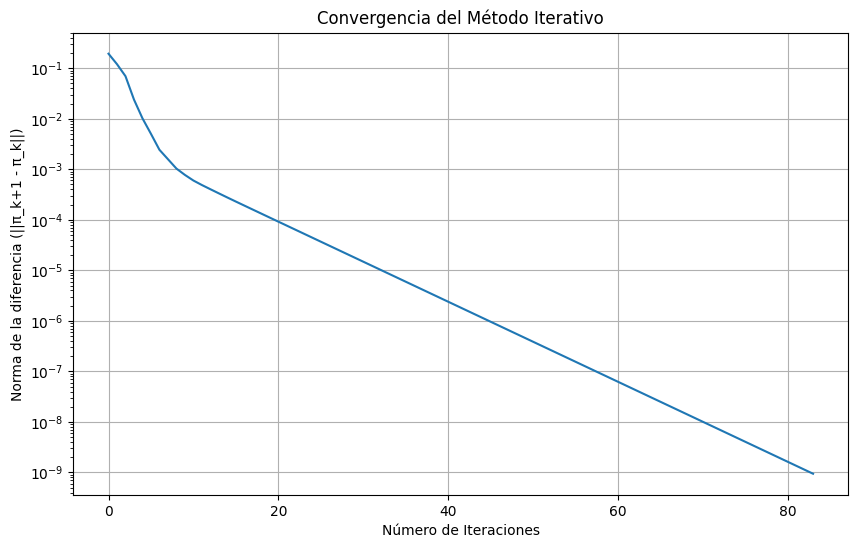

In [ ]:
TOLERANCIA = 1e-9
MAX_ITER = 5000
pi_iterativo = np.ones(NUM_CASILLAS) / NUM_CASILLAS
convergencia_iter = []

for i in range(MAX_ITER):
    pi_siguiente = pi_iterativo @ P
    diferencia = np.linalg.norm(pi_siguiente - pi_iterativo)
    convergencia_iter.append(diferencia)
    if diferencia < TOLERANCIA:
        print(f"Convergencia alcanzada en la iteración {i+1}.")
        break
    pi_iterativo = pi_siguiente
print("Vector pi (Método Iterativo) calculado.")

pi_iterativo[np.abs(pi_iterativo) < 1e-15] = 0

print("\nVector pi (Método Iterativo) \n")
pi_iterativo_series = pd.Series(pi_iterativo, index=range(1, 51))
print(pi_iterativo_series)

plt.figure(figsize=(10, 6))
plt.plot(convergencia_iter)
plt.title('Convergencia del Método Iterativo')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Norma de la diferencia (||π_k+1 - π_k||)')
plt.yscale('log')
plt.grid(True)
plt.show()

Este simulan cómo evolucionan las probabilidades de todo el sistema a la vez. Se comienza con una suposición inicial, asignando la misma probabilidad a cada casilla. En cada paso, este vector de probabilidades se multiplica por la matriz P. Esta operación ajusta todas las probabilidades simultáneamente, mostrando cómo "fluyen" de una casilla a otra en un solo turno. El proceso se repite hasta que el vector de probabilidades tiene un cambio muy despreciable.

***Cabe destacar que este fue el método utilizado en las clases de IA para encontrar la probabilidad estacionaria en los ejercicios.***

1. Criterio de Término

Para saber cuándo detener el proceso, se usó un criterio de término claro. El bucle se detiene cuando el cambio entre el vector de un paso y el siguiente es extremadamente pequeño, casi cero (menor a una tolerancia de 1e-9).

2. Gráfico de Convergencia

El gráfico de convergencia muestra cómo el "error" o cambio se va haciendo cada vez más pequeño en cada paso. Se observa que al principio los ajustes son grandes y rápidos, pero luego el proceso se estabiliza, lo que demuestra visualmente que el método encontró la solución correcta de forma eficiente.


# **5) Cálculo del Vector de Distribución Estacionaria (π) Utilizando Método Random-Walk**



Simulación de 2000000 pasos completada.
Vector pi (Simulación) calculado.

Vector pi (Simulación - Random Walk) 

1     0.134142
2     0.000000
3     0.001239
4     0.001313
5     0.001305
6     0.000000
7     0.000018
8     0.021319
9     0.021292
10    0.047485
11    0.052136
12    0.029983
13    0.000000
14    0.013669
15    0.025396
16    0.000000
17    0.076330
18    0.000000
19    0.000000
20    0.021221
21    0.021132
22    0.027877
23    0.000000
24    0.001395
25    0.034807
26    0.000073
27    0.000087
28    0.000204
29    0.000700
30    0.021762
31    0.004556
32    0.004647
33    0.004622
34    0.004884
35    0.009890
36    0.000000
37    0.021152
38    0.008741
39    0.008750
40    0.000000
41    0.000000
42    0.004718
43    0.038600
44    0.018269
45    0.034556
46    0.000000
47    0.068908
48    0.146613
49    0.000000
50    0.066209
dtype: float64


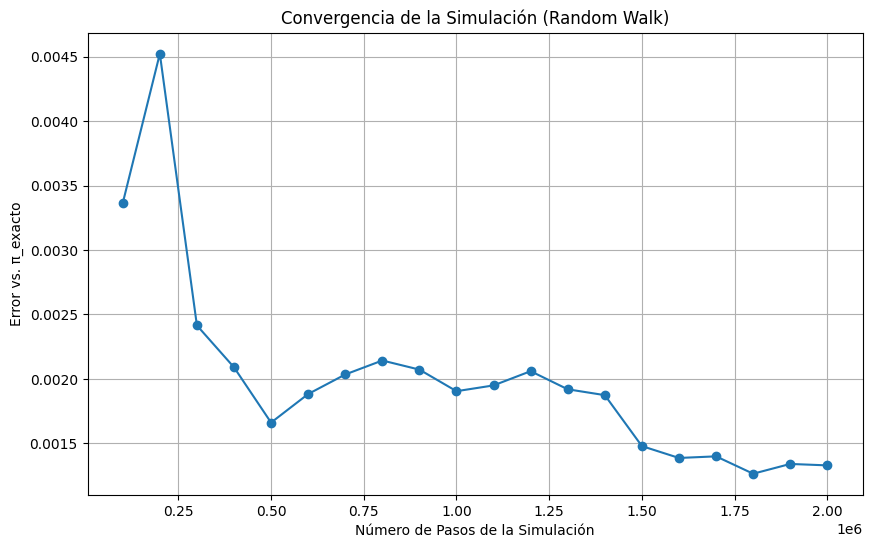

In [ ]:
NUM_PASOS = 2_000_000
casilla_actual = 0
visitas = np.zeros(NUM_CASILLAS)
convergencia_sim = []
pasos_plot = []

for paso in range(NUM_PASOS):
    visitas[casilla_actual] += 1
    casilla_actual = np.random.choice(np.arange(NUM_CASILLAS), p=P[casilla_actual, :])
    if (paso + 1) % 100000 == 0:
        pi_temporal = visitas / (paso + 1)
        error = np.linalg.norm(pi_temporal - pi_exacto)
        convergencia_sim.append(error)
        pasos_plot.append(paso + 1)
pi_simulado = visitas / NUM_PASOS
print(f"\nSimulación de {NUM_PASOS} pasos completada.")
print("Vector pi (Simulación) calculado.")

pi_simulado[np.abs(pi_simulado) < 1e-15] = 0

print("\nVector pi (Simulación - Random Walk) \n")
pi_simulado_series = pd.Series(pi_simulado, index=range(1, 51))
print(pi_simulado_series)

plt.figure(figsize=(10, 6))
plt.plot(pasos_plot, convergencia_sim, marker='o')
plt.title('Convergencia de la Simulación (Random Walk)')
plt.xlabel('Número de Pasos de la Simulación')
plt.ylabel('Error vs. π_exacto')
plt.grid(True)
plt.show()

Este método encuentra π de una forma completamente distinta: en lugar de resolver ecuaciones, simula una partida de juego muy larga. Se coloca un jugador virtual en el tablero y se le hace jugar millones de turnos. En cada turno, el jugador se mueve a una nueva casilla elegida al azar, pero siempre respetando las probabilidades de la matriz P. A lo largo de la simulación, se lleva un conteo de cuántas veces se visita cada casilla. Al final, π se calcula dividiendo el total de visitas de cada casilla por el número total de turnos, lo que da el porcentaje de tiempo que el jugador pasó en cada lugar.

1. Criterio de Término

El criterio para detener la simulación fue simplemente un número de pasos fijo y muy grande (2 millones). La justificación de por qué esto funciona es la Ley de los Grandes Números. Esta ley matemática asegura que si la simulación es lo suficientemente larga, el porcentaje de visitas a cada casilla se acercará muchísimo a su probabilidad real. Por lo tanto, en vez de esperar a que un cálculo se estabilice, se asegura la precisión corriendo un número masivo de turnos.

2. Gráfico de Convergencia

El gráfico muestra cómo la simulación se va acercando a la solución exacta a medida que avanzan los turnos. Mide el "error" que hay entre el π simulado en un momento dado y el π exacto que se calculó con el primer método. Se observa que al principio el error es grande, pero disminuye y se estabiliza conforme el número de pasos aumenta, demostrando visualmente que la simulación sí converge a la respuesta correcta.

# **6) Observaciones de las Comparaciones**

In [ ]:
error_iterativo = np.linalg.norm(pi_iterativo - pi_exacto)
error_simulado = np.linalg.norm(pi_simulado - pi_exacto)

print(f"Error del Método Matriz-Vector vs. el Método Exacto: {error_iterativo:.2e}")
print(f"Error del Método Random Walk vs. el Método Exacto:    {error_simulado:.2e}")


Error del Método Matriz-Vector vs. el Método Exacto: 5.67e-09
Error del Método Random Walk vs. el Método Exacto:    1.33e-03


**Observación 1**

La primera observación es la gran diferencia de precisión entre los métodos. Al comparar los resultados contra el Método Exacto, se ve que:

Error del Método Matriz-Vector vs. el Método Exacto: 0.00000000567 (un error despreciable).

Error del Método Random Walk vs. el Método Exacto: 0.00133

Esto nos dice que el Método Matriz-Vector es mucho más preciso que el Random Walk.


La razón es que el Matriz-Vector es un cálculo matemático determinista que converge a la solución real, mientras que el Random Walk es una simulación estadística que, aunque igual se acerca mucho al resultado real, depende mucho del azar.



**Observación 2**

Al correr el código, noté que el Método Matriz-Vector fue mucho más lento en comparación con el Método Exacto y el Random Walk.

Esto al principio parece raro, porque necesitó muy pocas iteraciones para encontrar la respuesta. Sin embargo, la razón es que cada una de esas iteraciones es muy "pesada" para el computador. En cada paso, tiene que hacer una multiplicación completa de un vector por la matriz de 50x50, lo que significa miles de operaciones.

En cambio, el Random Walk, aunque hizo 2 millones de pasos, era súper rápido en cada uno, ya que solo tenía que elegir un número al azar. El Método Matriz-Vector es muy preciso, pero más lento por la complejidad de sus cálculos, mientras que el Random Walk es más rápido en cada paso, pero menos preciso porque se basa en la pura repetición y el azar.







# **7) Duración Esperada de la Partida**

In [ ]:
Q = P[0:49, 0:49]
I_q = np.identity(49)
N = np.linalg.inv(I_q - Q)

duracion_esperada = N[0, :].sum()

print(f"\nLa duración esperada de una partida es: {duracion_esperada:.4f} turnos.")
print("\nInterpretación:")
print("\nEste es el número promedio de turnos que se necesitan para empezar en la casilla 1 y llegar")
print("por primera vez a la casilla 50. Es un promedio sobre muchas partidas.")


La duración esperada de una partida es: 14.1510 turnos.

Interpretación:

Este es el número promedio de turnos que se necesitan para empezar en la casilla 1 y llegar
por primera vez a la casilla 50. Es un promedio sobre muchas partidas.


# **8) Observaciones de las Vistas Esperadas**


Vector de visitas por partida calculado y guardado en 'vector_visitas.csv'


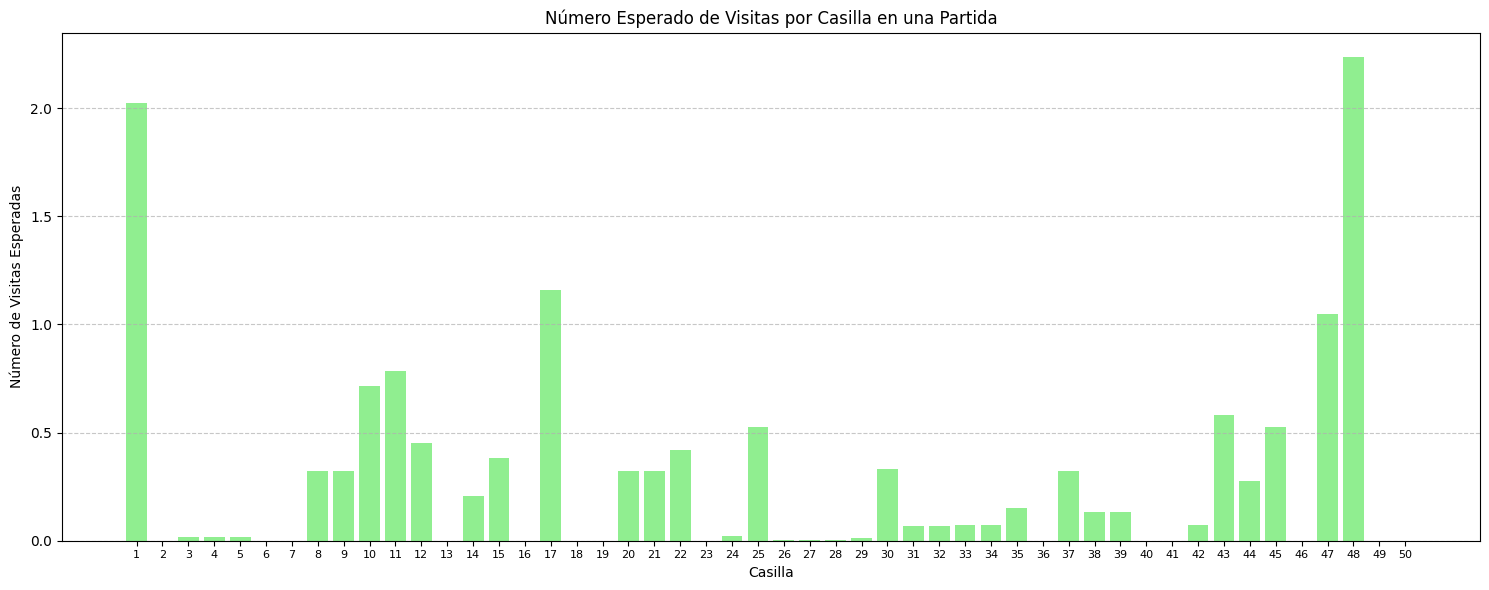

In [ ]:
vector_visitas = np.append(N[0, :], 0)

df_visitas = pd.DataFrame({
    'Visitas_Esperadas': vector_visitas
}, index=range(1, NUM_CASILLAS + 1))
df_visitas.to_csv('vector_visitas.csv')
print("\nVector de visitas por partida calculado y guardado en 'vector_visitas.csv'")

plt.figure(figsize=(15, 6))
plt.bar(range(1, 51), vector_visitas, color='lightgreen')
plt.title('Número Esperado de Visitas por Casilla en una Partida')
plt.xlabel('Casilla')
plt.ylabel('Número de Visitas Esperadas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(range(1, 51), fontsize=8)
plt.tight_layout()

plt.show()

**Observación 1**

Al ver el gráfico y nuestro csv generado, es que las casillas finales (47, 48 y 49) tienen las probabilidades más altas del juego.

La razón es la regla de "llegada exacta". Esta regla provoca que un jugador se quede en el mismo sitio si el número del dado lo hace pasarse de la meta. Por esto, es muy común que un jugador deba repetir su turno varias veces desde la misma casilla final hasta que logre sacar el número preciso que necesita para ganar.

Al estar forzado a pasar más turnos en estas últimas casillas, su probabilidad a largo plazo aumenta considerablemente. En cambio, la casilla 50 tiene una probabilidad cero, porque es un punto de reinicio inmediato del juego y nadie permanece ahí.

**Observación 2**

Varias casillas del tablero tienen un número de visitas de cero. Estas casillas corresponden exactamente a las bases de las escaleras y las cabezas de las serpientes. Esto tiene mucho sentido, porque un jugador nunca "permanece" en estas casillas para iniciar un turno. Apenas un jugador cae en una de ellas, es transportado a otro lugar, por lo que su contador de visitas (es decir, turnos que comienzan en esa casilla) debe ser cero.